In [1]:
import trainer
import torch
import random
import numpy as np
import os

from dataset import SeismogramDataset
from neural_networks.segnet import SegNet_3Head

In [2]:
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
ROOT_DIR = os.path.join(os.getcwd())

In [4]:
dataset_path = os.path.join(
    ROOT_DIR, 'abberator_v2_2000'
)

train_dataset = SeismogramDataset(os.path.join(dataset_path, 'train'))
val_dataset   = SeismogramDataset(os.path.join(dataset_path, 'val'))

In [5]:
from utils import number_of_parameters

model = SegNet_3Head()
number_of_parameters(model)

Total number of parameters: 4490880
Trainable number of parameters: 4490880


In [6]:
from trainer import BaseTrainer

t = BaseTrainer(model, 
                device, 
                train_dataset,
                optimizer_type=torch.optim.Adam,
                optimizer_params={'lr': 1e-4},
                snapshot_interval=250)

In [ ]:
t.train(batch_size=1)

Running training procedure:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 of 100:   0%|          | 0/1779 [00:00<?, ?it/s]

9.081361132107352


In [1]:
preds = model.forward(train_dataset[1]['seismogram'].unsqueeze(0))

NameError: name 'model' is not defined

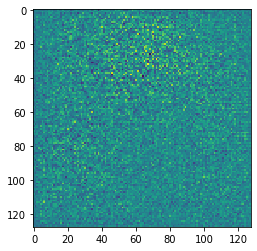

In [29]:
plt.imshow(preds[0].detach().numpy()[0])

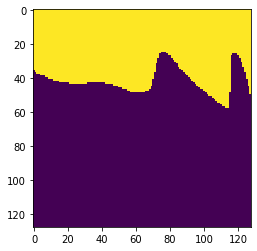

In [27]:
plt.imshow(train_dataset[1]['mask'])